RuntimeError: x must be a sequence

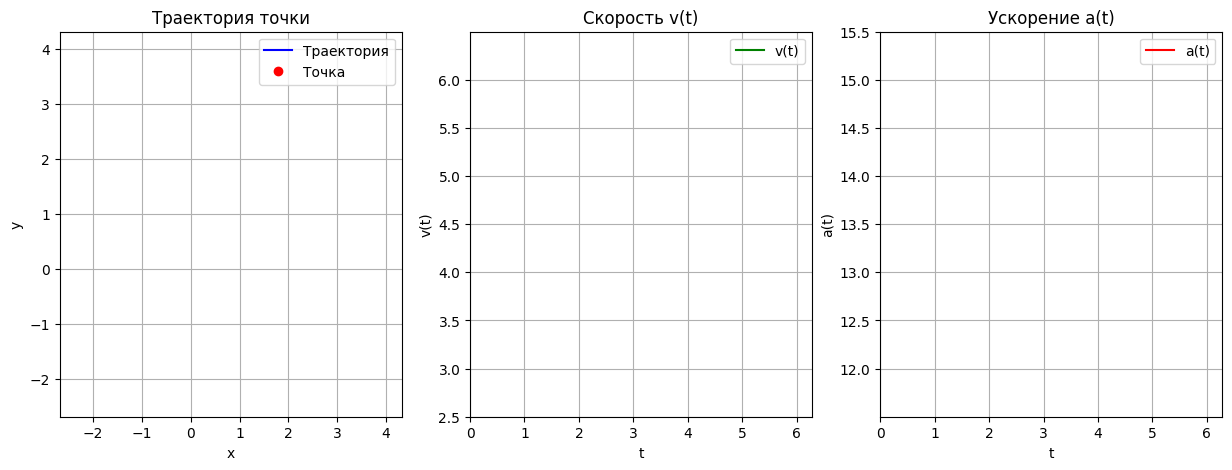

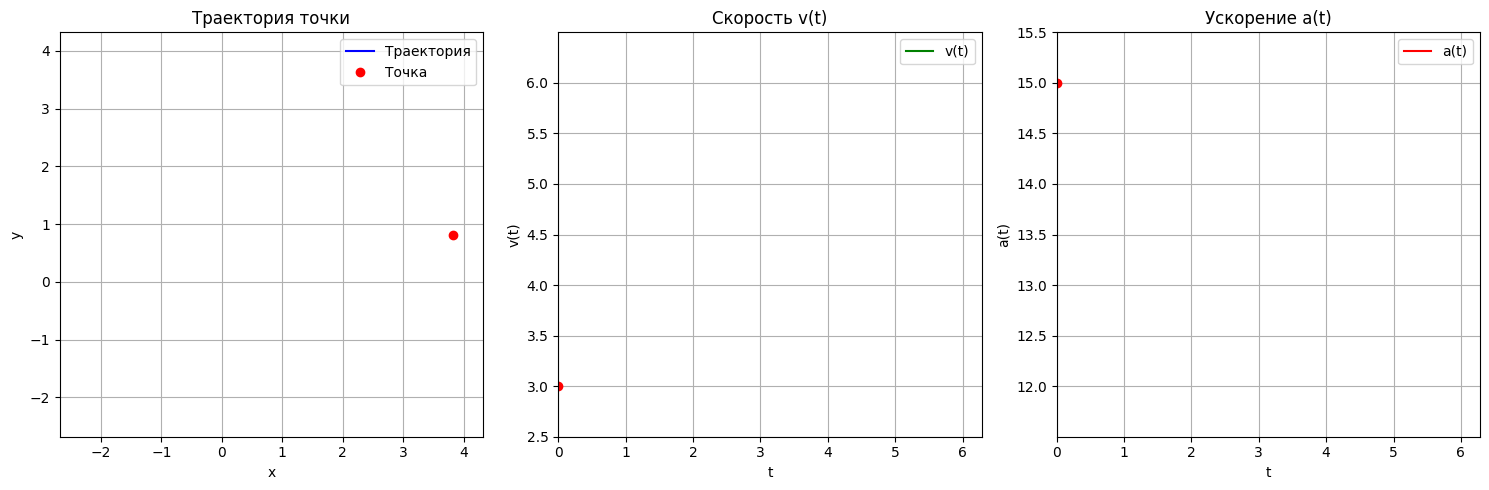

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sympy as sp

# Символьные переменные
t = sp.Symbol('t')
x = 3 * sp.cos(2 * t) * sp.cos(t) + 0.82
y = 3 * sp.cos(2 * t) * sp.sin(t) + 0.82

# Найдём скорость и ускорение
v_x = sp.diff(x, t)
v_y = sp.diff(y, t)
a_x = sp.diff(v_x, t)
a_y = sp.diff(v_y, t)
v = sp.sqrt(v_x**2 + v_y**2)
a = sp.sqrt(a_x**2 + a_y**2)

# Преобразуем в функции для численных вычислений
x_func = sp.lambdify(t, x, 'numpy')
y_func = sp.lambdify(t, y, 'numpy')
v_func = sp.lambdify(t, v, 'numpy')
a_func = sp.lambdify(t, a, 'numpy')

# Подготовка данных
t_vals = np.linspace(0, 2 * np.pi, 1000)
x_vals = x_func(t_vals)
y_vals = y_func(t_vals)
v_vals = v_func(t_vals)
a_vals = a_func(t_vals)

# Создание графиков
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# --- Траектория ---
ax1.set_xlim(min(x_vals) - 0.5, max(x_vals) + 0.5)
ax1.set_ylim(min(y_vals) - 0.5, max(y_vals) + 0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Траектория точки')
ax1.grid(True)
line1, = ax1.plot([], [], 'b-', label='Траектория')
point, = ax1.plot([], [], 'ro', label='Точка')
ax1.legend()

# --- Скорость ---
ax2.set_xlim(0, 2 * np.pi)
ax2.set_ylim(min(v_vals) - 0.5, max(v_vals) + 0.5)
ax2.set_xlabel('t')
ax2.set_ylabel('v(t)')
ax2.set_title('Скорость v(t)')
ax2.grid(True)
line2, = ax2.plot([], [], 'g-', label='v(t)')
point_v, = ax2.plot([], [], 'ro')
ax2.legend()

# --- Ускорение ---
ax3.set_xlim(0, 2 * np.pi)
ax3.set_ylim(min(a_vals) - 0.5, max(a_vals) + 0.5)
ax3.set_xlabel('t')
ax3.set_ylabel('a(t)')
ax3.set_title('Ускорение a(t)')
ax3.grid(True)
line3, = ax3.plot([], [], 'r-', label='a(t)')
point_a, = ax3.plot([], [], 'ro')
ax3.legend()

# Функция анимации
def animate(i):
    line1.set_data(x_vals[:i], y_vals[:i])
    point.set_data([x_vals[i]], [y_vals[i]])
    line2.set_data(t_vals[:i], v_vals[:i])
    point_v.set_data([t_vals[i]], [v_vals[i]])
    line3.set_data(t_vals[:i], a_vals[:i])
    point_a.set_data([t_vals[i]], [a_vals[i]])
    return line1, point, line2, point_v, line3, point_a

# Создание анимации
ani = FuncAnimation(fig, animate, frames=len(t_vals), interval=20, blit=True)

# --- Вариант 1: показать ---
plt.tight_layout()
plt.show()

# --- Вариант 2: сохранить в GIF или MP4 ---
ani.save("trajectory_simulation.gif", writer="pillow")
# ani.save("trajectory_simulation.mp4", writer="ffmpeg", fps=50)


s:\code\vscode\Skillbox_Python_NeuralVision\.conda\Lib\site-packages\matplotlib\quiver.py:678: RuntimeWarning: Mean of empty slice.
  amean = a.mean()
s:\code\vscode\Skillbox_Python_NeuralVision\.conda\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


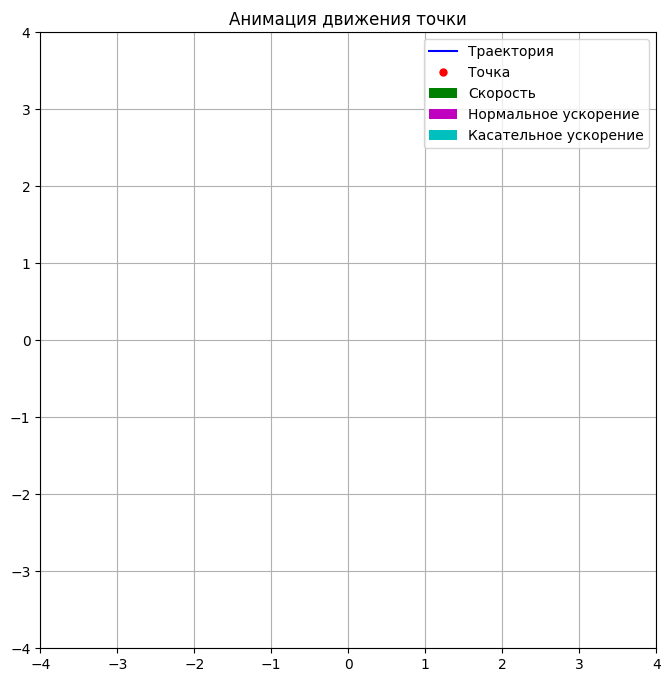

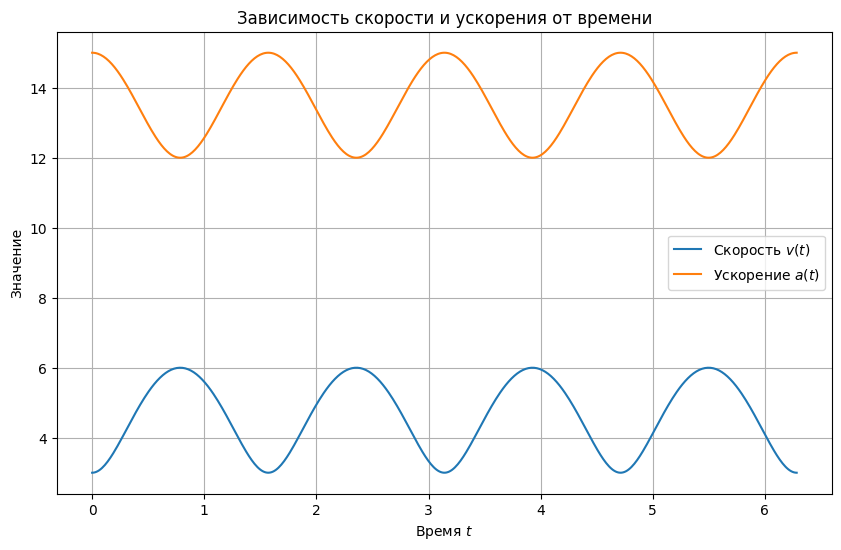

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Шаг 1: Определение переменной t
t = sp.symbols('t')

# Уравнения траектории
x_expr = 3 * sp.cos(2*t) * sp.cos(t) + 0.82
y_expr = 3 * sp.cos(2*t) * sp.sin(t) + 0.82

# Первые производные (скорость)
vx_expr = sp.diff(x_expr, t)
vy_expr = sp.diff(y_expr, t)

# Вторые производные (ускорение)
ax_expr = sp.diff(vx_expr, t)
ay_expr = sp.diff(vy_expr, t)

# Перевод выражений в функции для численных вычислений
x_func = sp.lambdify(t, x_expr, 'numpy')
y_func = sp.lambdify(t, y_expr, 'numpy')
vx_func = sp.lambdify(t, vx_expr, 'numpy')
vy_func = sp.lambdify(t, vy_expr, 'numpy')
ax_func = sp.lambdify(t, ax_expr, 'numpy')
ay_func = sp.lambdify(t, ay_expr, 'numpy')

# Функция для вычисления нормального и касательного ускорений
def get_acceleration_components(vx, vy, ax, ay):
    v = np.sqrt(vx**2 + vy**2)
    at = (vx * ax + vy * ay) / v
    an = np.sqrt(ax**2 + ay**2 - at**2)
    return at, an

# Диапазон времени
t_vals = np.linspace(0, 2 * np.pi, 500)
x_vals = x_func(t_vals)
y_vals = y_func(t_vals)

# Вычисление скорости и ускорения
vx_vals = vx_func(t_vals)
vy_vals = vy_func(t_vals)
v_vals = np.sqrt(vx_vals**2 + vy_vals**2)

ax_vals = ax_func(t_vals)
ay_vals = ay_func(t_vals)
a_vals = np.sqrt(ax_vals**2 + ay_vals**2)

# Разложение ускорения на компоненты
at_vals, an_vals = get_acceleration_components(vx_vals, vy_vals, ax_vals, ay_vals)

# Анимация
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.grid(True)

line, = ax.plot([], [], 'b-', label='Траектория')
point, = ax.plot([], [], 'ro', markersize=5, label='Точка')
velocity_arrow = ax.quiver([], [], [], [], color='g', label='Скорость')
normal_acceleration_arrow = ax.quiver([], [], [], [], color='m', label='Нормальное ускорение')
tangent_acceleration_arrow = ax.quiver([], [], [], [], color='c', label='Касательное ускорение')

time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    point.set_data([], [])
    velocity_arrow.set_UVC(0, 0)
    normal_acceleration_arrow.set_UVC(0, 0)
    tangent_acceleration_arrow.set_UVC(0, 0)
    time_text.set_text('')
    return line, point, velocity_arrow, normal_acceleration_arrow, tangent_acceleration_arrow, time_text

def animate(i):
    this_x = x_vals[:i+1]
    this_y = y_vals[:i+1]
    
    line.set_data(this_x, this_y)
    point.set_data(x_vals[i], y_vals[i])
    
    # Вектор скорости
    velocity_arrow.set_offsets([x_vals[i], y_vals[i]])
    velocity_arrow.set_UVC(vx_vals[i], vy_vals[i])
    
    # Вектор нормального ускорения
    normal_acceleration_arrow.set_offsets([x_vals[i], y_vals[i]])
    normal_acceleration_arrow.set_UVC(an_vals[i] * (-vy_vals[i]), an_vals[i] * vx_vals[i])
    
    # Вектор касательного ускорения
    tangent_acceleration_arrow.set_offsets([x_vals[i], y_vals[i]])
    tangent_acceleration_arrow.set_UVC(at_vals[i] * vx_vals[i], at_vals[i] * vy_vals[i])
    
    time_text.set_text(f't = {t_vals[i]:.2f}')
    
    return line, point, velocity_arrow, normal_acceleration_arrow, tangent_acceleration_arrow, time_text

ani = FuncAnimation(fig, animate, init_func=init, frames=len(t_vals), interval=20, blit=True)
plt.legend()
plt.title('Анимация движения точки')
plt.show()

# Графики v(t) и a(t)
plt.figure(figsize=(10, 6))
plt.plot(t_vals, v_vals, label='Скорость $v(t)$')
plt.plot(t_vals, a_vals, label='Ускорение $a(t)$')
plt.xlabel('Время $t$')
plt.ylabel('Значение')
plt.title('Зависимость скорости и ускорения от времени')
plt.legend()
plt.grid(True)
plt.show()

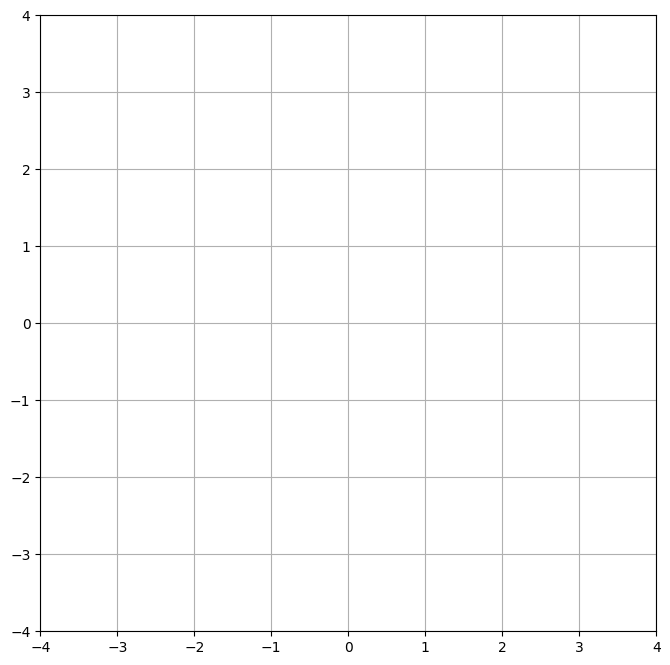

IndexError: list index out of range

In [5]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Используем переменную t для времени
t = sp.symbols('t')

# Уравнения траектории
x_expr = 3 * sp.cos(2*t) * sp.cos(t) + 0.82
y_expr = 3 * sp.cos(2*t) * sp.sin(t) + 0.82

# Первые производные (скорость)
vx_expr = sp.diff(x_expr, t)
vy_expr = sp.diff(y_expr, t)

# Вторые производные (ускорение)
ax_expr = sp.diff(vx_expr, t)
ay_expr = sp.diff(vy_expr, t)

# Преобразуем выражения в функции для численных вычислений
x_func = sp.lambdify(t, x_expr, 'numpy')
y_func = sp.lambdify(t, y_expr, 'numpy')
vx_func = sp.lambdify(t, vx_expr, 'numpy')
vy_func = sp.lambdify(t, vy_expr, 'numpy')
ax_func = sp.lambdify(t, ax_expr, 'numpy')
ay_func = sp.lambdify(t, ay_expr, 'numpy')

# Функция для вычисления нормального и касательного ускорений
def get_acceleration_components(vx, vy, ax, ay):
    v = np.sqrt(vx**2 + vy**2)
    at = (vx * ax + vy * ay) / v  # Касательное ускорение
    an = np.sqrt(ax**2 + ay**2 - at**2)  # Нормальное ускорение
    return at, an

# Диапазон времени
t_vals = np.linspace(0, 2 * np.pi, 500)

# Создание графика
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.grid(True)

# Инициализация элементов графика
xdata, ydata = [], []
ln, = plt.plot([], [], 'b-', label='Траектория')
point, = plt.plot([], [], 'ro', markersize=5, label='Точка')

# Список для хранения векторов
vecs = []

# Инициализация анимации
def init():
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.legend()
    return ln, point

# Обновление кадров анимации
def update(frame):
    # Вычисление координат точки
    x = x_func(frame)
    y = y_func(frame)
    
    # Вычисление скорости и ускорения
    vx = vx_func(frame)
    vy = vy_func(frame)
    ax_val = ax_func(frame)
    ay_val = ay_func(frame)
    
    # Вычисление нормального и касательного ускорений
    at, an = get_acceleration_components(vx, vy, ax_val, ay_val)
    
    # Обновление или создание векторов
    if len(vecs) == 0:
        vecs.extend([
            ax.quiver(x, y, vx, vy, color='g', angles='xy', scale_units='xy', scale=1, label='Скорость'),
            ax.quiver(x, y, ax_val, ay_val, color='m', angles='xy', scale_units='xy', scale=1, label='Ускорение'),
            ax.quiver(x, y, at * vx / np.sqrt(vx**2 + vy**2), at * vy / np.sqrt(vx**2 + vy**2),
                      color='c', angles='xy', scale_units='xy', scale=1, label='Касательное ускорение'),
            ax.quiver(x, y, -an * vy / np.sqrt(vx**2 + vy**2), an * vx / np.sqrt(vx**2 + vy**2),
                      color='r', angles='xy', scale_units='xy', scale=1, label='Нормальное ускорение')
        ])
    elif len(vecs) >= 4:
        vecs[0].set_UVC(vx, vy)
        vecs[1].set_UVC(ax_val, ay_val)
        vecs[2].set_UVC(at * vx / np.sqrt(vx**2 + vy**2), at * vy / np.sqrt(vx**2 + vy**2))
        vecs[3].set_UVC(-an * vy / np.sqrt(vx**2 + vy**2), an * vx / np.sqrt(vx**2 + vy**2))
    
    # Обновление траектории и точки
    xdata.append(x)
    ydata.append(y)
    ln.set_data(xdata, ydata)
    point.set_data(x, y)
    
    return ln, point

# Создание анимации
anim = FuncAnimation(fig, update, frames=t_vals, init_func=init, blit=False, interval=20)

# Показать анимацию
plt.show()

# Сохранение анимации в файл
writer = PillowWriter(fps=30)
anim.save('animation.gif', writer=writer)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

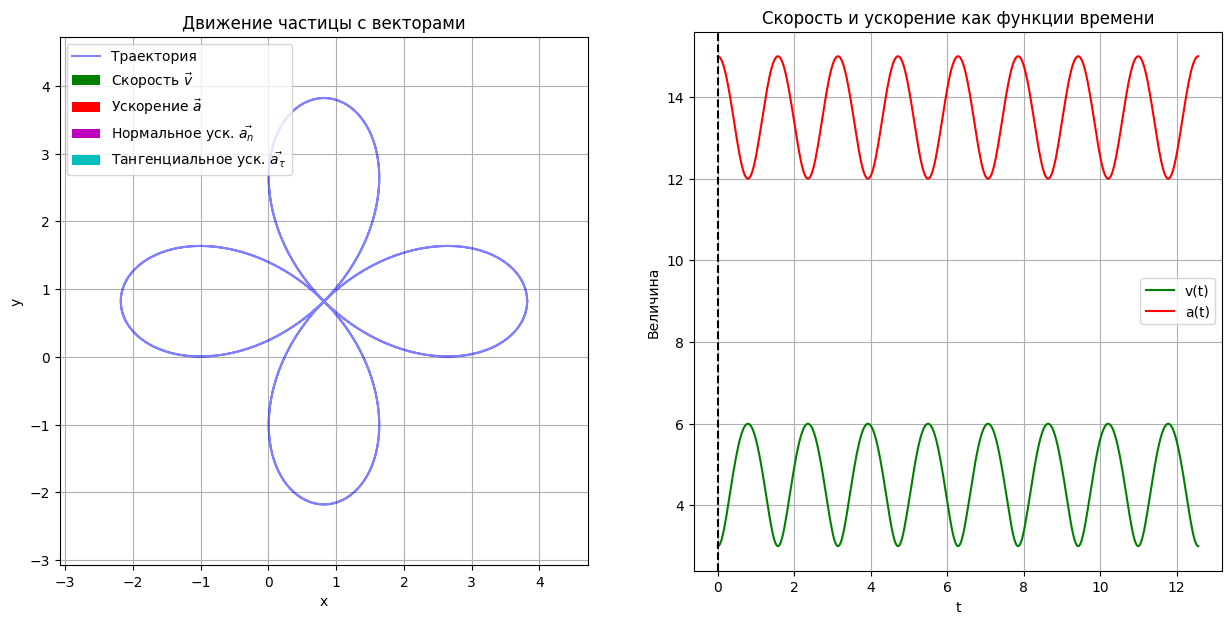

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sympy as sp

# Определение символьной переменной
t = sp.Symbol('t')

# Определение параметрических уравнений
x = 3 * sp.cos(2*t) * sp.cos(t) + 0.82
y = 3 * sp.cos(2*t) * sp.sin(t) + 0.82

# Расчет первых производных (компоненты скорости)
x_dot = sp.diff(x, t)
y_dot = sp.diff(y, t)
v_vec_sym = sp.Matrix([x_dot, y_dot]) # Символьный вектор скорости

# Расчет вторых производных (компоненты ускорения)
x_ddot = sp.diff(x_dot, t)
y_ddot = sp.diff(y_dot, t)
a_vec_sym = sp.Matrix([x_ddot, y_ddot]) # Символьный вектор ускорения

# Расчет модуля скорости
v_magnitude_sym = sp.sqrt(sp.simplify(x_dot**2 + y_dot**2))

# Расчет модуля ускорения
a_magnitude_sym = sp.sqrt(sp.simplify(x_ddot**2 + y_ddot**2))

# Расчет тангенциального ускорения (вектор)
# Единичный касательный вектор
# Используем Piecewise для обработки случая v=0 символьно
unit_tangent_vec_sym = sp.Matrix([sp.Piecewise((x_dot / v_magnitude_sym, sp.Ne(v_magnitude_sym, 0)), (0, True)),
                                  sp.Piecewise((y_dot / v_magnitude_sym, sp.Ne(v_magnitude_sym, 0)), (0, True))])

# Скалярное тангенциальное ускорение
at_scalar_sym = a_vec_sym.dot(unit_tangent_vec_sym)

# Вектор тангенциального ускорения
at_vec_sym = sp.simplify(at_scalar_sym * unit_tangent_vec_sym) # Упростим выражение

# Расчет нормального ускорения (вектор)
an_vec_sym = sp.simplify(a_vec_sym - at_vec_sym) # Упростим выражение


# Преобразование символьных выражений в числовые функции
x_func = sp.lambdify(t, x, 'numpy')
y_func = sp.lambdify(t, y, 'numpy')
vx_func = sp.lambdify(t, x_dot, 'numpy')
vy_func = sp.lambdify(t, y_dot, 'numpy')
ax_func = sp.lambdify(t, x_ddot, 'numpy')
ay_func = sp.lambdify(t, y_ddot, 'numpy')
v_magnitude_func = sp.lambdify(t, v_magnitude_sym, 'numpy')
a_magnitude_func = sp.lambdify(t, a_magnitude_sym, 'numpy')

# Lambdify компонент векторов тангенциального и нормального ускорения
at_vec_x_func = sp.lambdify(t, at_vec_sym[0], 'numpy')
at_vec_y_func = sp.lambdify(t, at_vec_sym[1], 'numpy')
an_vec_x_func = sp.lambdify(t, an_vec_sym[0], 'numpy')
an_vec_y_func = sp.lambdify(t, an_vec_sym[1], 'numpy')


# Диапазон времени для построения графиков и анимации
t_range = np.linspace(0, 4*np.pi, 400) # Увеличим диапазон и количество точек

# Генерация точек кривой
x_points = x_func(t_range)
y_points = y_func(t_range)
v_magnitude_points = v_magnitude_func(t_range)
a_magnitude_points = a_magnitude_func(t_range)


# Создание фигуры и осей
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Построение траектории на первом графике
ax1.plot(x_points, y_points, 'b-', alpha=0.5, label='Траектория')
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Движение частицы с векторами')

# Установка пределов графика с запасом
min_x, max_x = np.min(x_points), np.max(x_points)
min_y, max_y = np.min(y_points), np.max(y_points)
x_range_plot = max_x - min_x
y_range_plot = max_y - min_y
padding = max(x_range_plot, y_range_plot) * 0.15 # Добавим немного запаса
ax1.set_xlim(min_x - padding, max_x + padding)
ax1.set_ylim(min_y - padding, max_y + padding)


# Построение v(t) и a(t) на втором графике
ax2.plot(t_range, v_magnitude_points, 'g-', label='v(t)')
ax2.plot(t_range, a_magnitude_points, 'r-', label='a(t)')
ax2.grid(True)
ax2.set_xlabel('t')
ax2.set_ylabel('Величина')
ax2.set_title('Скорость и ускорение как функции времени')
ax2.legend()

# Элементы анимации на первом графике (ax1)
particle, = ax1.plot([], [], 'ro', markersize=8)

# Графики для векторов (будут обновляться во время анимации)
# Используем quiver для более наглядного отображения векторов-стрелок
# Масштаб векторов может потребоваться настроить
vel_arrow = ax1.quiver([], [], [], [], color='g', units='xy', angles='xy', scale_units='xy', scale=1, label='Скорость $\\vec{v}$')
acc_arrow = ax1.quiver([], [], [], [], color='r', units='xy', angles='xy', scale_units='xy', scale=1, label='Ускорение $\\vec{a}$')
an_arrow = ax1.quiver([], [], [], [], color='m', units='xy', angles='xy', scale_units='xy', scale=1, label='Нормальное уск. $\\vec{a_n}$')
at_arrow = ax1.quiver([], [], [], [], color='c', units='xy', angles='xy', scale_units='xy', scale=1, label='Тангенциальное уск. $\\vec{a_\\tau}$')


# Элемент анимации на втором графике (ax2)
time_indicator = ax2.axvline(x=t_range[0], color='k', linestyle='--')


# Добавление легенды к первому графику
ax1.legend()

# Коэффициент масштабирования для визуализации векторов (может потребоваться настройка)
# Вместо scale в set_data, используем параметр scale в quiver
vector_display_scale = 1.0 # Единицы данных (xy)


def init():
    # Инициализация объектов на первом графике (ax1)
    particle.set_data([], [])
    vel_arrow.set_UVC([], [])
    acc_arrow.set_UVC([], [])
    an_arrow.set_UVC([], [])
    at_arrow.set_UVC([], [])
    vel_arrow.set_offsets([])
    acc_arrow.set_offsets([])
    an_arrow.set_offsets([])
    at_arrow.set_offsets([])

    # Инициализация объектов на втором графике (ax2)
    time_indicator.set_xdata([t_range[0]])

    # Возвращаем все объекты, которые будут обновляться
    return particle, vel_arrow, acc_arrow, an_arrow, at_arrow, time_indicator

def update(frame):
    t_val = t_range[frame]

    # Расчет значений в текущий момент времени
    x_val = x_func(t_val)
    y_val = y_func(t_val)

    vx = vx_func(t_val)
    vy = vy_func(t_val)

    ax = ax_func(t_val)
    ay = ay_func(t_val)

    at_x = at_vec_x_func(t_val)
    at_y = at_vec_y_func(t_val)

    an_x = an_vec_x_func(t_val)
    an_y = an_vec_y_func(t_val)

    # Обновление позиции частицы на ax1
    particle.set_data([x_val], [y_val])

    # Обновление векторов на ax1 (с использованием quiver)
    # Обновляем компоненты векторов
    vel_arrow.set_UVC(vx, vy)
    acc_arrow.set_UVC(ax, ay)

    # Проверяем на конечные значения перед обновлением
    if np.isfinite(at_x) and np.isfinite(at_y):
        at_arrow.set_UVC(at_x, at_y)
    else:
        at_arrow.set_UVC(0, 0) # Устанавливаем нулевой вектор при некорректных значениях

    if np.isfinite(an_x) and np.isfinite(an_y):
        an_arrow.set_UVC(an_x, an_y)
    else:
        an_arrow.set_UVC(0, 0) # Устанавливаем нулевой вектор при некорректных значениях


    # Обновляем начальную точку векторов до текущей позиции частицы
    vel_arrow.set_offsets([[x_val, y_val]])
    acc_arrow.set_offsets([[x_val, y_val]])
    at_arrow.set_offsets([[x_val, y_val]])
    an_arrow.set_offsets([[x_val, y_val]])


    # Обновление индикатора времени на ax2
    time_indicator.set_xdata([t_val, t_val])

    # Возвращаем все обновленные объекты
    return particle, vel_arrow, acc_arrow, an_arrow, at_arrow, time_indicator

# Создание анимации
# Указываем frames, чтобы итерироваться по индексам t_range
# interval в миллисекундах
# blit=True для более быстрой отрисовки (обновляются только измененные объекты)
anim = FuncAnimation(fig, update, frames=len(t_range),
                     init_func=init, blit=True, interval=50)

plt.tight_layout()
plt.show()

RuntimeError: x must be a sequence

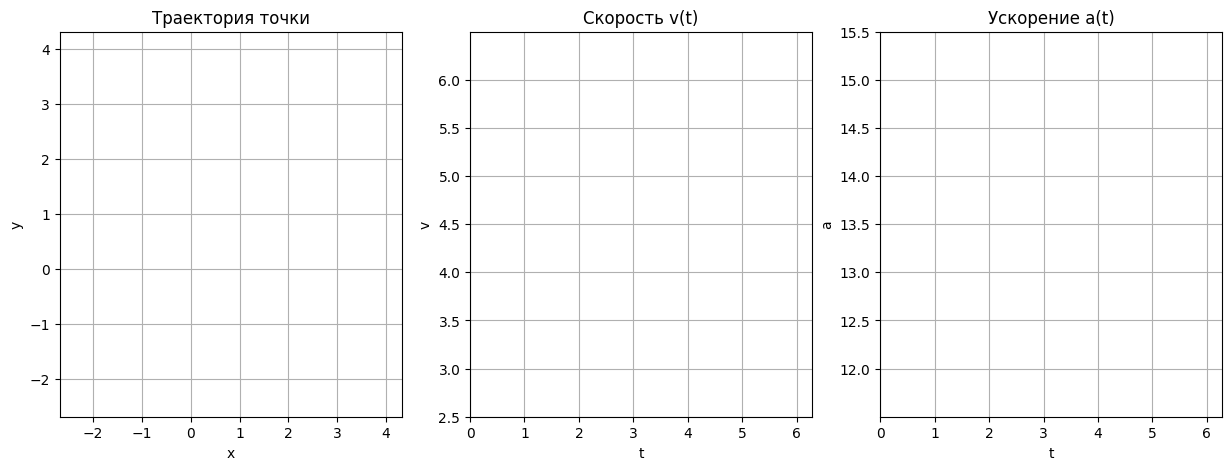

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sympy as sp

# Символьные переменные
t = sp.Symbol('t')
x = 3 * sp.cos(2 * t) * sp.cos(t) + 0.82
y = 3 * sp.cos(2 * t) * sp.sin(t) + 0.82

# Найдём скорость и ускорение
v_x = sp.diff(x, t)
v_y = sp.diff(y, t)
a_x = sp.diff(v_x, t)
a_y = sp.diff(v_y, t)
v = sp.sqrt(v_x**2 + v_y**2)
a = sp.sqrt(a_x**2 + a_y**2)

# Преобразуем в численные функции
x_func = sp.lambdify(t, x, 'numpy')
y_func = sp.lambdify(t, y, 'numpy')
v_func = sp.lambdify(t, v, 'numpy')
a_func = sp.lambdify(t, a, 'numpy')

# Данные
t_vals = np.linspace(0, 2 * np.pi, 500)
x_vals = x_func(t_vals)
y_vals = y_func(t_vals)
v_vals = v_func(t_vals)
a_vals = a_func(t_vals)

# Фигура и оси
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# --- Траектория ---
ax1.set_xlim(min(x_vals) - 0.5, max(x_vals) + 0.5)
ax1.set_ylim(min(y_vals) - 0.5, max(y_vals) + 0.5)
ax1.set_title("Траектория точки")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid()
line1, = ax1.plot([], [], 'b-')
dot1, = ax1.plot([], [], 'ro')

# --- Скорость ---
ax2.set_xlim(0, 2 * np.pi)
ax2.set_ylim(min(v_vals) - 0.5, max(v_vals) + 0.5)
ax2.set_title("Скорость v(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("v")
ax2.grid()
line2, = ax2.plot([], [], 'g-')
dot2, = ax2.plot([], [], 'ro')

# --- Ускорение ---
ax3.set_xlim(0, 2 * np.pi)
ax3.set_ylim(min(a_vals) - 0.5, max(a_vals) + 0.5)
ax3.set_title("Ускорение a(t)")
ax3.set_xlabel("t")
ax3.set_ylabel("a")
ax3.grid()
line3, = ax3.plot([], [], 'r-')
dot3, = ax3.plot([], [], 'ro')

# Функция обновления
def animate(i):
    line1.set_data(x_vals[:i], y_vals[:i])
    dot1.set_data(x_vals[i], y_vals[i])
    line2.set_data(t_vals[:i], v_vals[:i])
    dot2.set_data(t_vals[i], v_vals[i])
    line3.set_data(t_vals[:i], a_vals[:i])
    dot3.set_data(t_vals[i], a_vals[i])
    return line1, dot1, line2, dot2, line3, dot3

# Создание анимации
ani = FuncAnimation(fig, animate, frames=len(t_vals), interval=20, blit=True)

# Отображение в ноутбуке
IPython.display.HTML(ani.to_jshtml())
